# Get Songs from Spotify Playlist

In [137]:
# Libraries
import requests
import re
import json
import config
import matplotlib.pyplot as plt

In [123]:
# Get token
url = "https://accounts.spotify.com/api/token"

payload=f'client_id={config.CLIENT_ID}&client_secret={config.CLIENT_SECRET}&grant_type=client_credentials'
headers = {
  'Content-Type': 'application/x-www-form-urlencoded',
  'Cookie': '__Host-device_id=AQA1E_8u1HHZzuE7O9d_fV4YwanfNozg6q_mdfweHpowhpZGWG9saI45tX6W5no4APxdKSdgb0ZqexZNfHeYiXVZhLhlP5JYj0M; sp_tr=false'
}

response = requests.request("POST", url, headers=headers, data=payload)

AccessToken = json.loads(response.text)['access_token']
AccessToken

'BQAsXYCXM0DBlITeEDplm1FDO_iP3T7hqo03p7zHqnk5ZpCK9ahUpfR4hACT7JthxQ_jxavBcpoGQqA6Inr1FUxI8OqfCOk6dA292LUJPXHroAt5EsFz'

## Access Token
Access token is required to call Spotify API. In this case, the Access token needs to be refreshed every time the request is called. The Spotify credential used is the creator of the code.

In [124]:
# Sample Link
link = 'https://open.spotify.com/playlist/3EZXILd3Au7L8Wna75GUz3?si=cc22f026f7e34fd7'

In [125]:
# Get Link ID
playlist_id = re.search(r'(?<=playlist/)\w+', link).group()

playlist_id

'3EZXILd3Au7L8Wna75GUz3'

In [126]:
url = f"https://api.spotify.com/v1/playlists/{playlist_id}"

payload={}
headers = {
  'Authorization': f'Bearer {AccessToken}'
}

playlistDetail = requests.get(url, headers=headers, data=payload).json()

print(f"Playlist Name: {playlistDetail['name']}")

Playlist Name: My Playlist #32


In [127]:
import requests

url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"

payload={}
headers = {
  'Authorization': f'Bearer {AccessToken}'
}

response = requests.get(url, headers=headers, data=payload).json()

print(response)

{'href': 'https://api.spotify.com/v1/playlists/3EZXILd3Au7L8Wna75GUz3/tracks?offset=0&limit=100', 'items': [{'added_at': '2023-03-31T08:49:06Z', 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/jeconiahri'}, 'href': 'https://api.spotify.com/v1/users/jeconiahri', 'id': 'jeconiahri', 'type': 'user', 'uri': 'spotify:user:jeconiahri'}, 'is_local': False, 'primary_color': None, 'track': {'album': {'album_group': 'single', 'album_type': 'single', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1XlLhtgJjC4ROQZilBZAvw'}, 'href': 'https://api.spotify.com/v1/artists/1XlLhtgJjC4ROQZilBZAvw', 'id': '1XlLhtgJjC4ROQZilBZAvw', 'name': 'Nic D', 'type': 'artist', 'uri': 'spotify:artist:1XlLhtgJjC4ROQZilBZAvw'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/5zixe6AbgXPqt4c1uSl94L'}, 'href': 'https://api.spotify.com/v1/artists/5zixe6AbgXPqt4c1uSl94L', 'id': '5zixe6AbgXPqt4c1uSl94L', 'name': 'Connor Price', 'type': 'artist', 'uri': 'spoti

In [128]:
import json

# Get all song ID inside the playlist
id_list = []

id_list = [song['track']['id'] for song in response['items']]

id_list

['0xcSj8Zchf6OwaSOAPAkbg', '1nTzXNZCnZ0T7S8BqkL98r', '0P6AWOA4LG1XOctzaVu5tt']

In [129]:
def getSongMetadata(song_id):
    url = f"https://api.spotify.com/v1/tracks/{song_id}"

    payload={}
    headers = {
        'Authorization': f'Bearer {AccessToken}'
    }

    songMetadata = requests.get(url, headers=headers, data=payload).json()

    return songMetadata

In [130]:
with open('convert.json', 'w') as convert_file:
     convert_file.write(json.dumps(getSongMetadata('0xcSj8Zchf6OwaSOAPAkbg'), indent=4))

In [131]:
def getAudioFeature(song_id):
    url = f"https://api.spotify.com/v1/audio-features/{song_id}"

    payload = {}
    headers = {
        'Authorization': f'Bearer {AccessToken}'
    }

    songAudioFeature = requests.get(url, headers=headers, data=payload).json()

    return songAudioFeature

In [132]:
# Variable definitions
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
tempo = []
valence = []

In [133]:
# # Version 1.0: Manual iteration
# danceability.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['danceability'])
# energy.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['energy'])
# key.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['key'])
# loudness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['loudness'])
# mode.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['mode'])
# speechiness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['speechiness'])
# acousticness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['acousticness'])
# instrumentalness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['instrumentalness'])
# liveness.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['liveness'])
# tempo.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['tempo'])
# valence.append(getAudioFeature('0xcSj8Zchf6OwaSOAPAkbg')['valence'])


In [134]:
# Version 1.1: One iteration for all
def extractMetadata(AudioFeatureFunc):
    # Append all the informations to the list
    _ = AudioFeatureFunc
    danceability.append(_['danceability'])
    energy.append(_['energy'])
    key.append(_['key'])
    loudness.append(_['loudness'])
    mode.append(_['mode'])
    speechiness.append(_['speechiness'])
    acousticness.append(_['acousticness'])
    instrumentalness.append(_['instrumentalness'])
    liveness.append(_['liveness'])
    tempo.append(_['tempo'])
    valence.append(_['valence'])

In [135]:
for id in id_list:
    extractMetadata(getAudioFeature(id))

In [136]:
valence

[0.88, 0.452, 0.667]

## Plotting the Similarity within the features with Box Plot
Box plotting is one way to see the distrbution of the data within the feature.

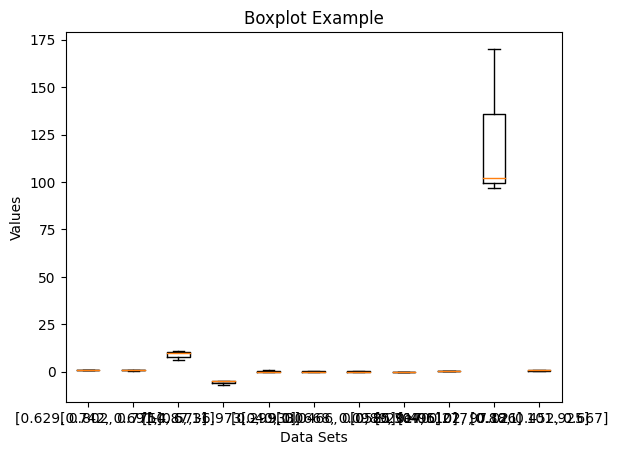

In [138]:
fig, ax = plt.subplots()

# Plot the boxplots
ax.boxplot([danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, tempo, valence])

# Set labels for the plot
ax.set_title('Boxplot Example')
ax.set_xlabel('Data Sets')
ax.set_ylabel('Values')

# Set x-axis tick labels
ax.set_xticklabels(['danceability', energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, tempo, valence])

# Show the plot
plt.show()